# Curve Fitting

Data may be described by a *mathematical function*. Finding the best-fit function and *parameters* for a set of data is called *curve fitting*. In general, using a function generated from curve fitting in order to describe some process, whether it is physical, biological, social, economical, etc., is called *emperical modeling.* The mathematical function found for the best-fit curve is often called the **mathematical model** or **emperical model**.

Shiflet and Shiflet, in *Introduction to Computational Science*, say, "An emperical model is based only on data and is used to predict, not explain a system. An emperical model consists of a function that captures the trend of the data." (Boldfaced font is included in the quote.)

Before we start, import the necessary packages.

In [1]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert string to a dataframe
from scipy.optimize import curve_fit #used to find the fit parameters

# Linear Curve Fit

The most common function to fit to a set of data is a straight line. This is called a *linear* function or a *linear curve fit*. Since your first algebra class, you have probably written this mathematical function in the form:

$y = mx + b$

where $m$ is the slope and $b$ is the intercept. I will call this our *emperical model* or just *model* for short. The constants $m$ and $b$ are the *curve fit parameters*.

## Steps

The logical steps to curve-fitting are:

1. Read and plot the data and ask:
   - What mathematical function might fit the data?
   - Over what range (of the independent variable) will we fit the data?   
1. Create a Python function with arguments for the independent variable and curve-fit parameters. This function should use the emperical model to calculate and return the dependent variable.
2. Find the best-fit parameters.
3. Create arrays of points using the best-fit parameters to use for plotting the best-fit function. I will call this the *model data*.
4. Plot the best-fit function (*model data*) and the measured data on the same graph.
5. Print the curve fit parameters.

## Example: Beer's Law

Chemists use Beer's Law to measure concentration of a solution based on its absorbance of light. (Read [this brief tutorial](http://www.chem.ucla.edu/~harding/IGOC/B/beers_law.html) that includes photos as a demonstration of the principle.) 

In the cell below, there is data from an introductory chemistry lab at HPU. In this lab, students dissolve grape Kool-Aid in water with varying amounts (concentrations) of grape-flavored powder. Then, they use their plot to find the concentration of an unknown mixture of Kool-Air. (The data was provided by Dr. Pam Knippenburg, HPU Department of Chemistry. Students in the introductory chemistry lab mix different concentrations of grape Kool-Aid and measure the absorbance of light by the Kool-Aid.)

Although not from this experiment, here is a picture that shows what the solutions might look like for red Kool-Aid. ([Image source](https://www.sciencebuddies.org/science-fair-projects/project-ideas/Chem_p106/chemistry/kool-aid-dye-adsorption#procedure))

![](https://www.sciencebuddies.org/L3G6X97kaLGF9NfpviqhzT9NK90=/825x241/-/https/www.sciencebuddies.org/cdn/Files/8073/8/calibration-solutions.jpg)

In the cell below we:

1. read the data.
2. plot the data.

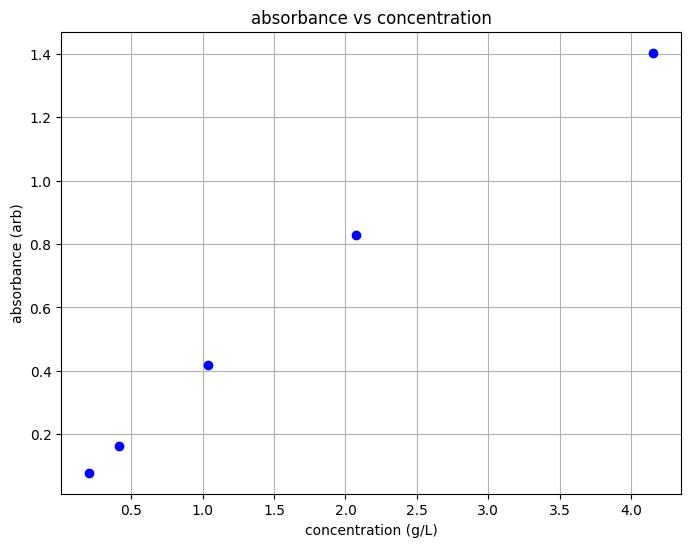

In [2]:
# define data
#The columns are: concentration (g/L)	absorbance (arb)
data = StringIO("""x	y
0.2077	0.079
0.4154	0.164
1.0385	0.418
2.077	0.827
4.154	1.403
""") 

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("absorbance vs concentration")
plt.xlabel('concentration (g/L)')
plt.ylabel('absorbance (arb)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo') #plot data
plt.show()


Now, we can create a Python function for our emperical model, which is

$$y = mx+b$$

And we call the `curve_fit()` function which automatically calculates the best-fit parameters and returns them in a list.

In [3]:
# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,m,b: m*x + b

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

print(params)
print("The slope is ", params[0])
print("The intercept is ", params[1])

[0.33645366 0.04710116]
The slope is  0.3364536642894845
The intercept is  0.04710116268470077


Now, we can *calculate* points for our best-fit curve (or line in this case) and plot the best-fit curve on the same graph as our data.

Choose a range for the calculated points that is similar to the range of your data.

In the example below, I use `*params` which gives me a list of the curve-fit parameters.

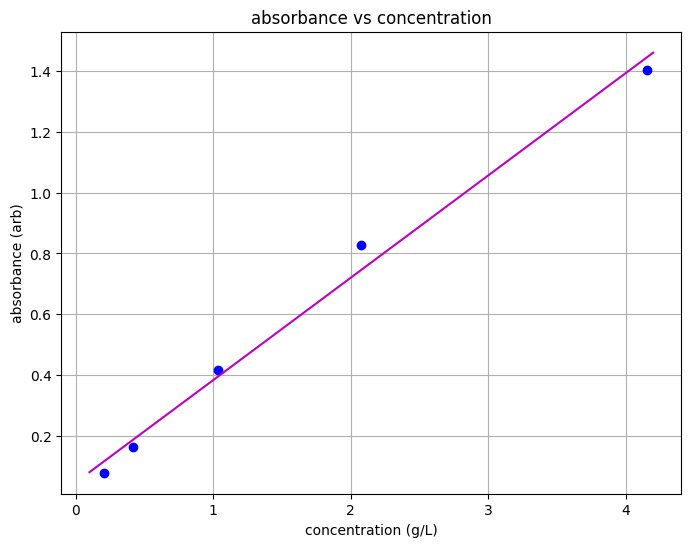

In [4]:
xmodel = np.linspace(0.1,4.2,100)
ymodel = model(xmodel,*params)

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("absorbance vs concentration")
plt.xlabel('concentration (g/L)')
plt.ylabel('absorbance (arb)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo') #plot data
plt.plot(xmodel,ymodel,'m-') #plot the best-fit curve
plt.show()

## Putting it all together

Here is all of the code necessary to fit the data and plot the best-fit curve with the data on the same graph.

[0.33645366 0.04710116]
The slope is  0.3364536642894845
The intercept is  0.04710116268470077


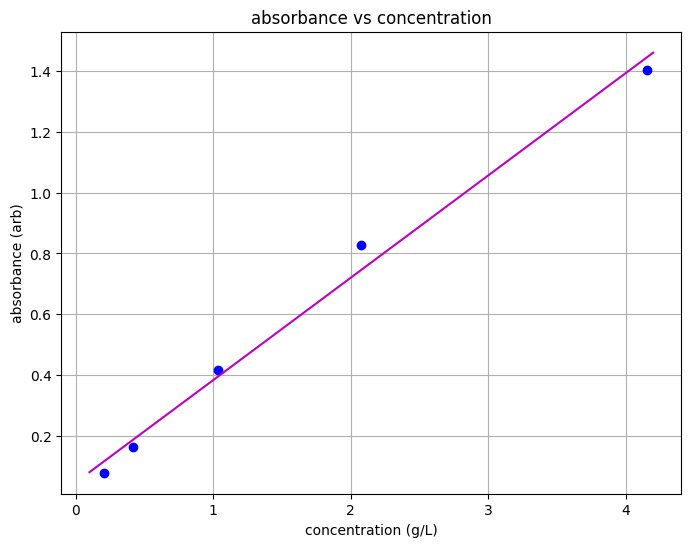

In [5]:
# define data
#The columns are: concentration (g/L)	absorbance (arb)
data = StringIO("""x	y
0.2077	0.079
0.4154	0.164
1.0385	0.418
2.077	0.827
4.154	1.403
""") 

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,m,b: m*x + b

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

print(params)
print("The slope is ", params[0])
print("The intercept is ", params[1])

# calculate points for the best-fit curve
xmodel = np.linspace(0.1,4.2,100)
ymodel = model(xmodel,*params)

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("absorbance vs concentration")
plt.xlabel('concentration (g/L)')
plt.ylabel('absorbance (arb)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo') #plot data
plt.plot(xmodel,ymodel,'m-') #plot the best-fit curve
plt.show()


## Exercise - Position vs. Time

In this experiment, a ball rolls on a track with constant velocity.

![](https://github.com/atitus/math-modeling/raw/master/unit-02/02-04-manual-curve-fitting/uniform-motion-ball-fast-main.gif)

The x-position of the ball is measured at the times indicated by red markers in the animated gif. The data for x-position and time are below. Add additional code to plot both the data and a linear model. Find the coefficients for the best-fit.

[ 0.52443866 -0.80159075]
The slope is  0.5244386567582777
The intercept is  -0.8015907480752648


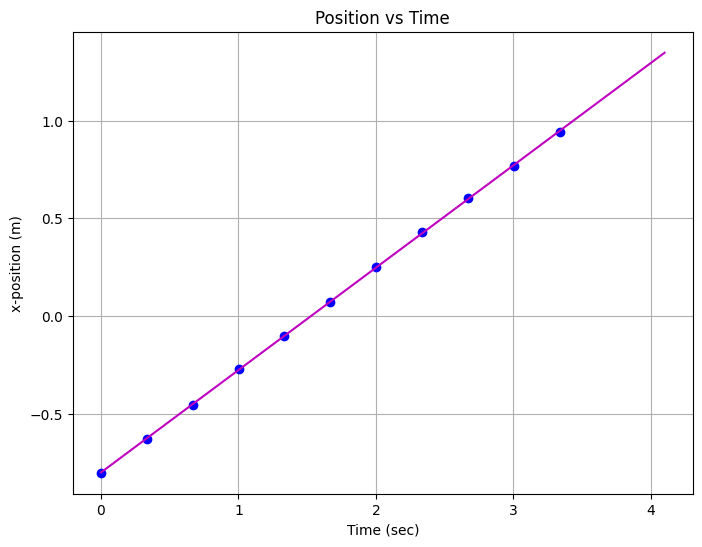

In [9]:
# define data
#The columns are: time (s)	x-position (m)
data = StringIO("""x	y
0	-0.803
0.334	-0.629
0.667	-0.454
1.001	-0.273
1.335	-0.102
1.668	0.072
2.002	0.25
2.336	0.432
2.669	0.603
3.003	0.77
3.337	0.941
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,m,b: m*x + b

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

print(params)
print("The slope is ", params[0])
print("The intercept is ", params[1])

# calculate points for the best-fit curve
xmodel = np.linspace(0,4.100)
ymodel = model(xmodel,*params)

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Position vs Time")
plt.xlabel('Time (sec)')
plt.ylabel('x-position (m)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo') #plot data
plt.plot(xmodel,ymodel,'m-') #plot the best-fit curve
plt.show()

## Exercise - Brain Weight vs. Body Weight

Here is data for brain weight (in pounds) vs. body weight (in pounds) for mammals. We will use this data to explore what is happening under the hood when we are curve fitting.

In [8]:
# define data
#The columns are: Body Mass (kg)	Brain Mass (g)
data = StringIO("""x	y
3.385	44.5
0.48	15.5
1.35	8.1
465	423
36.33	119.5
27.66	115
14.83	98.2
1.04	5.5
4.19	58
0.425	6.4
0.101	4
0.92	5.7
1	6.6
0.005	0.14
0.06	1
3.5	10.8
2	12.3
1.7	6.3
2547	4603
0.023	0.3
187.1	419
521	655
0.785	3.5
10	115
3.3	25.6
0.2	5
1.41	17.5
529	680
207	406
85	325
0.75	12.3
62	1320
6654	5712
3.5	3.9
6.8	179
35	56
4.05	17
0.12	1
0.023	0.4
0.01	0.25
1.4	12.5
250	490
2.5	12.1
55.5	175
100	157
52.16	440
10.55	179.5
0.55	2.4
60	81
3.6	21
4.288	39.2
0.28	1.9
0.075	1.2
0.122	3
0.048	0.33
192	180
3	25
160	169
0.9	2.6
1.62	11.4
0.104	2.5
4.235	50.4
""")


### How does this work? Manually finding the best value of fit parameters

The difference between the *predicted* y value of the model and the *actual* y value of the measured data is called the *residual*. For the best values of the fit parameters, the data will be closest to the best-fit curve and the absolute value of the *residuals* will be a minimum. For theoretical reasons, it is the squares of the *residuals* that is minimized.

The program below plots the brain mass vs. body mass of mammals but does *not* use an automatic curve fit. You can change the values of `m` and `b` for the model. The last part:

```python
# calculate sum of residuals
ypredicted = m*xdata + b
residuals = ypredicted - ydata
sum_of_residuals_squared = sum(residuals**2)
print("The sum of the squares of the residuals is {:4e}.".format(sum_of_residuals_squared))
```
calculates and prints the sum of the squares of the residuals.

Slope is 0.9664963676926819 and intercept is 91.00439620505037.
The sum of the squares of the residuals is 7.213173e+06.


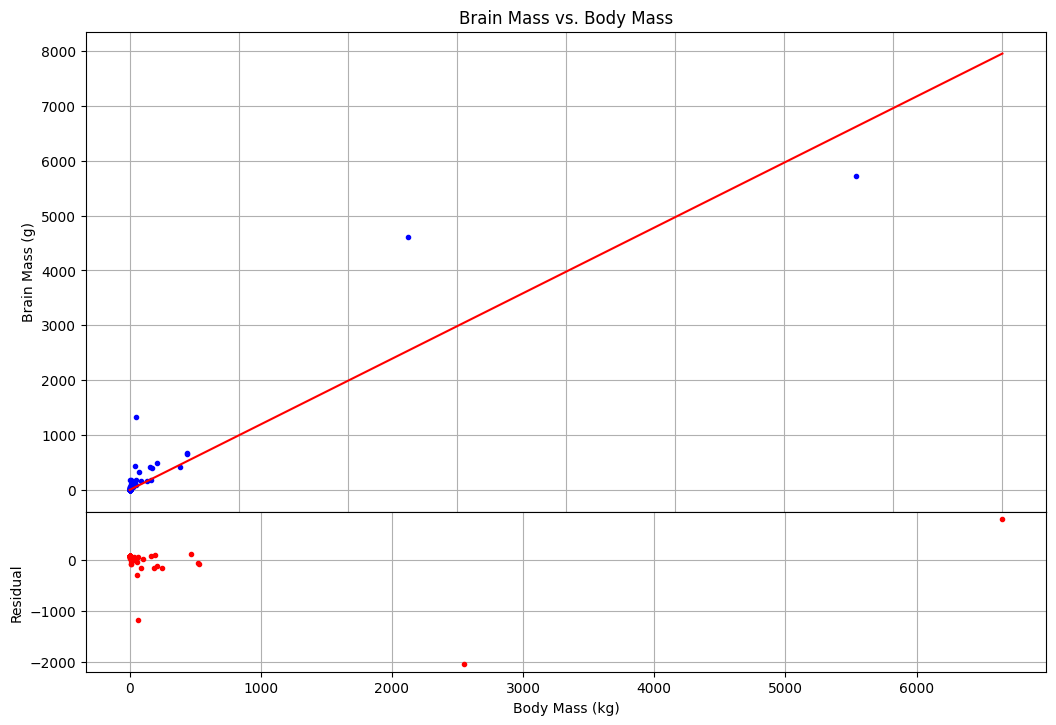

In [30]:
# define data
#The columns are: Body Mass (kg)	Brain Mass (g)
data = StringIO("""x	y
3.385	44.5
0.48	15.5
1.35	8.1
465	423
36.33	119.5
27.66	115
14.83	98.2
1.04	5.5
4.19	58
0.425	6.4
0.101	4
0.92	5.7
1	6.6
0.005	0.14
0.06	1
3.5	10.8
2	12.3
1.7	6.3
2547	4603
0.023	0.3
187.1	419
521	655
0.785	3.5
10	115
3.3	25.6
0.2	5
1.41	17.5
529	680
207	406
85	325
0.75	12.3
62	1320
6654	5712
3.5	3.9
6.8	179
35	56
4.05	17
0.12	1
0.023	0.4
0.01	0.25
1.4	12.5
250	490
2.5	12.1
55.5	175
100	157
52.16	440
10.55	179.5
0.55	2.4
60	81
3.6	21
4.288	39.2
0.28	1.9
0.075	1.2
0.122	3
0.048	0.33
192	180
3	25
160	169
0.9	2.6
1.62	11.4
0.104	2.5
4.235	50.4
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")
#print(df.head())

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define constants and create points for a linear function
# m and b are initial guesses
m = 0.994
b = 0
xmodel = np.linspace(0,8000,10000) # independent variable used for drawing a best-fit curve
ymodel = m*xmodel + b # dependent variable used for drawing a best-fit curve

model = lambda x,m,b: m*x+b
params,covarience = curve_fit(model,xdata,ydata)
print(f"Slope is {params[0]} and intercept is {params[1]}.")

# calculate sum of residuals
ypredicted = m*xdata + b #use model to calculate predicted values of y
residuals = ypredicted - ydata
sum_of_residuals_squared = sum(residuals**2)
print("The sum of the squares of the residuals is {:4e}.".format(sum_of_residuals_squared))

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot data and model
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.plot(xdata,ydata,'b.') # data
plt.plot(xmodel,ymodel,'r-') # best fit model
plt.grid()
plt.title("Brain Mass vs. Body Mass")
plt.ylabel("Brain Mass (g)")

# plot residuals
frame1.set_xticklabels([]) # remove x-tic labels for the first frame
residuals = model(xdata,*params) - ydata
frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.plot(xdata,residuals,'r.')
plt.ylabel("Residual")
plt.xlabel("Body Mass (kg)")
plt.grid()

plt.show()



### Exercise

In the program above, change the value of `m` and continue changing it until you *minimize* the sum of the squares of the residuals. Find the best-fit value of `m` to three decimal places. Compare your result to what the automatic curve fit gave you.

With our manual minimization we found a slope of 0.994. Using the automatic curve fit we found a slope of 0.966

## Exponential Curve Fit

Another common emperical model is an exponential: 

$$y = Ae^{rx}$$

where $x$ is the independent variable and $y$ is the dependent variable. The fit parameters are $A$ and $r$ where $A$ is the value of $y$ at $x=0$ and $r$ is the rate of growth (if positive) or rate of decay (if negative).

Let's begin by playing with the parameters to see how they affect the function.

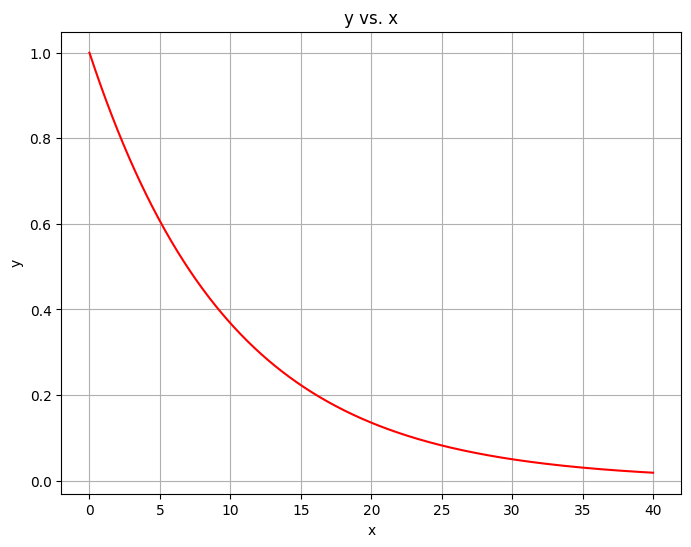

In [34]:
# define constants and create points for a linear function
# m and b are initial guesses
A = 1
r = -0.1
xmodel = np.linspace(0,40,1000) # independent variable used for drawing a best-fit curve
ymodel = A*np.exp(r*xmodel) # dependent variable used for drawing a best-fit curve

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("y vs. x")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(which='both', axis='both')
plt.plot(xmodel, ymodel, 'r-') #plot emperical model
plt.show()

## Exercise - Adjust parameters

1. If `A=0` in the previous program, how does this affect the function?
If `A=0` then the function is always zero.

2. Set `A` back to 1, and change `r`. Try increasing `r` to 0.5. Try changing it to a negative value (-0.1 and -0.5). How does the absolute value of `r` and its sign affect the exponential curve?
The higher the value of `r` the quicker the function changes. If it's negative then the function approaches 0. If it is positive it approaches infinity

## Example - Discharging Capacitor

Here's an example of a circuit with a discharging capacitor. 

https://youtu.be/Gg9yTs9tzmk

In the cell below, the voltage across the capacitor is plotted as a function of time.


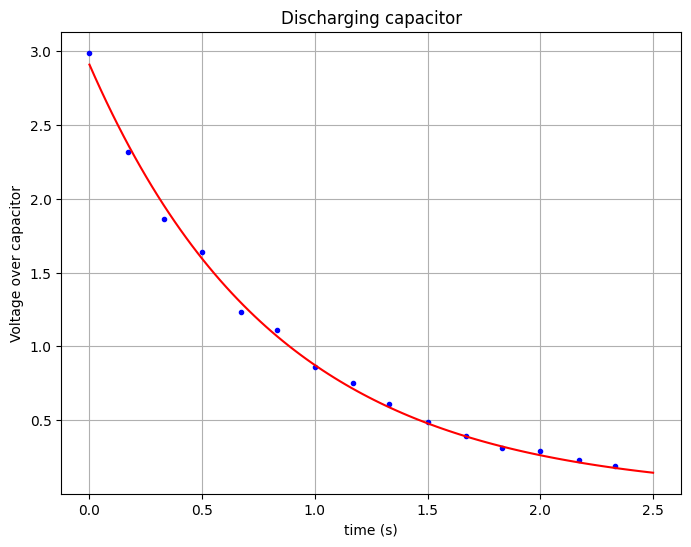

In [37]:
# define data
#The columns are: t (min)	V (volt)
data = StringIO("""x	y
0	2.99
0.17	2.32
0.33	1.86
0.50	1.64
0.67	1.23
0.83	1.11
1.00	0.86
1.17	0.75
1.33	0.61
1.50	0.49
1.67	0.39
1.83	0.31
2.00	0.29
2.17	0.23
2.33	0.19
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")
#print(df.head())

# define arrays for the data
xdata = df['x']
ydata = df['y']

model = lambda x,A,r: A*np.exp(r*x)
guess = [1,1]
params,cov = curve_fit(model, xdata,ydata,p0=guess)

xmodel = np.linspace(0,2.5,100)
ymodel = model(xmodel, *params)

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Discharging capacitor")
plt.xlabel('time (s)')
plt.ylabel('Voltage over capacitor')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'b.') #plot data
plt.plot(xmodel,ymodel, 'r-')
plt.show()

## Exercise - Fit an exponential model to the data for the discharging capacitor

Add or edit the code in the program above to:

1. propertly title and label the graph.
2. find the best-fit curve for the data.
3. plot the best-fit curve and the data on the same graph


## Exercise - COVID cases at HPU

Here is data for the total number of COVID cases at HPU reported on each day after Aug. 21, 2020. We will define Aug. 21 as day 0. I attempted to get the data for this year, but no one would give it to me :'(

Fit and plot an exponential model to the data. Use your model to answer the following questions:

1. What are the best-fit parameters?
2. What does your model predict for the number of COVID cases at HPU 5 days from the last data point?
3. How many days from now (and on what date) will the number of cases be 20% of the student population? (The population is approximately 5,000 students.)

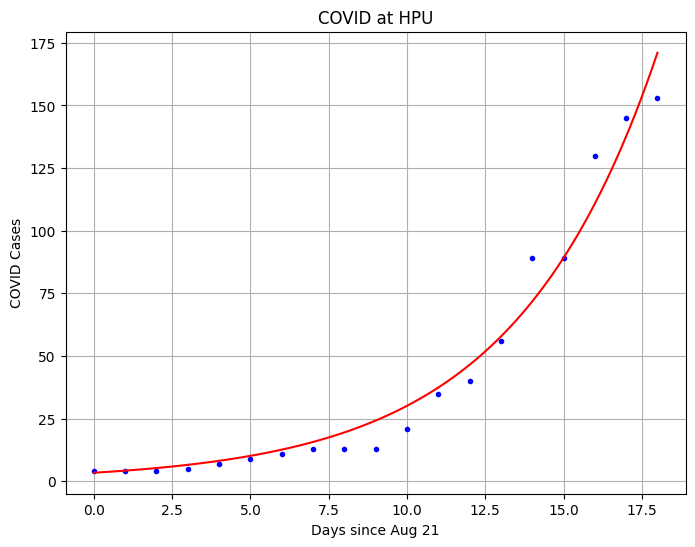

In [40]:

#define data
#The columns are: Day	Total Cases
data = StringIO("""x	y
0	4
1	4
2	4
3	5
4	7
5	9
6	11
7	13
8	13
9	13
10	21
11	35
12	40
13	56
14	89
15	89
16	130
17	145
18	153
""")
                
model = lambda x,A,r: A*np.exp(r*x)
# convert data to dataframe
df = pd.read_csv(data, sep ="\t")
#print(df.head())

# define arrays for the data
xdata = df['x']
ydata = df['y']

model = lambda x,A,r: A*np.exp(r*x)
guess = [1,1]
params,cov = curve_fit(model, xdata,ydata,p0=guess)

xmodel = np.linspace(0,18,100)
ymodel = model(xmodel, *params)

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("COVID at HPU")
plt.xlabel('Days since Aug 21')
plt.ylabel('COVID Cases')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'b.') #plot data
plt.plot(xmodel,ymodel, 'r-')
plt.show()

## Part 2 - Fitting a range of data

Suppose we add another few days of data to our COVID case counts. Below is the data up to day 21. Copy your code from above and use it to plot and fit this additional data. 

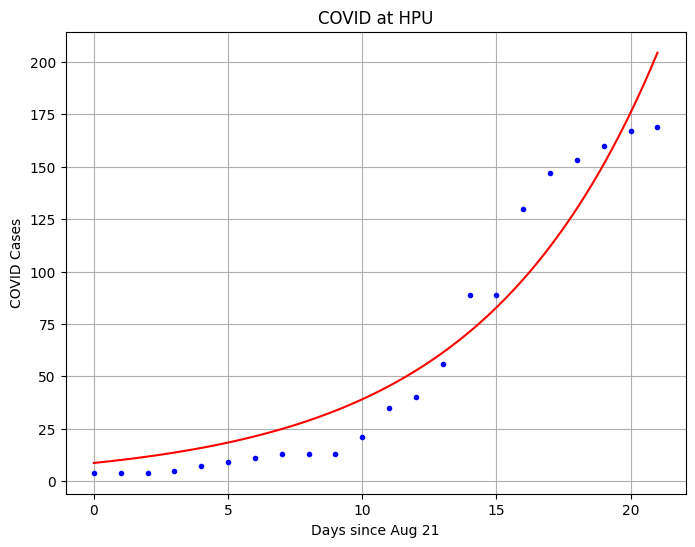

In [42]:
#define data
#The columns are: Day	Total Cases
data = StringIO("""x	y
0	4
1	4
2	4
3	5
4	7
5	9
6	11
7	13
8	13
9	13
10	21
11	35
12	40
13	56
14	89
15	89
16	130
17	147
18	153
19	160
20	167
21	169
""")
                
model = lambda x,A,r: A*np.exp(r*x)
# convert data to dataframe
df = pd.read_csv(data, sep ="\t")
#print(df.head())

# define arrays for the data
xdata = df['x']
ydata = df['y']

model = lambda x,A,r: A*np.exp(r*x)
guess = [1,1]
params,cov = curve_fit(model, xdata,ydata,p0=guess)

xmodel = np.linspace(0,21,100)
ymodel = model(xmodel, *params)

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("COVID at HPU")
plt.xlabel('Days since Aug 21')
plt.ylabel('COVID Cases')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'b.') #plot data
plt.plot(xmodel,ymodel, 'r-')
plt.show()

Now that you've plotted the data, you can see that the exponential function doesn't fit the data very well. However, it might fit the data between Day 0 and Day 13, which is a total of 14 data points. To create lists for the first 14 data points, we will use:

```
xdata2 = xdata[0:14]
ydata2 = ydata[0:14]
```

Each list *include* index 0 and *excludes* index 14. Thus, the data includes index 0 through index 13.

The cell below contains to code to fit the data on this sub-range. Run it. Where does the data start deviating from the model?


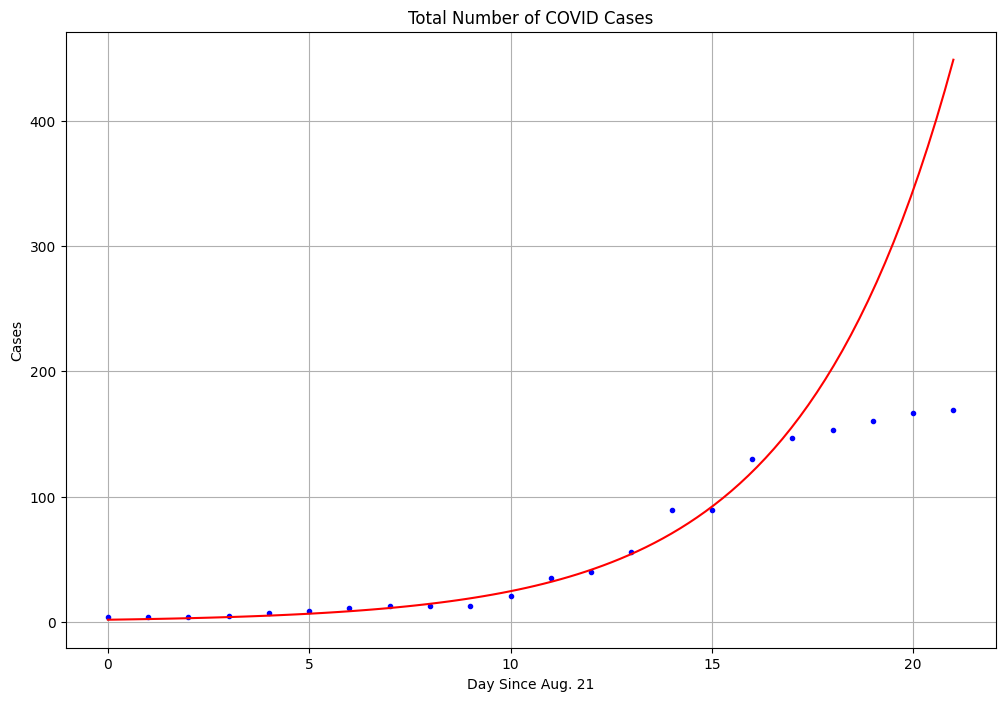

The curve fit parameters are:  1.7444645403009305 0.2642591101553074


In [43]:
#define data
#The columns are: Day	Total Cases
data = StringIO("""x	y
0	4
1	4
2	4
3	5
4	7
5	9
6	11
7	13
8	13
9	13
10	21
11	35
12	40
13	56
14	89
15	89
16	130
17	147
18	153
19	160
20	167
21	169
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define arrays for index 0 through index 13.
xdata2 = xdata[0:14]
ydata2 = ydata[0:14]

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,A,r: A*np.exp(r*x)

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata2, ydata2, p0=guess)

# calculate points for the model
xmodel = np.linspace(0,21,100)
ymodel = model(xmodel,*params)

# create graph
fig = plt.figure(figsize=(12,8))
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') # best fit model
plt.grid()
plt.title("Total Number of COVID Cases")
plt.ylabel("Cases")
plt.xlabel("Day Since Aug. 21")
plt.show()

#results
print("The curve fit parameters are: ",*params)


## Part 3: Improving a Model

While the COVID-19 data during the first 13 days fits an exponential growth model, the data starts to flatten out at approximately day 17. So let's fit a logistic function of the form:

$$y = \frac{L}{1+e^{-k(x-x_0)}}$$

where $L$, $k$, and $x_0$ are fit parameters.

**Fit a logistic function to the data and find the best-fit parameters.**

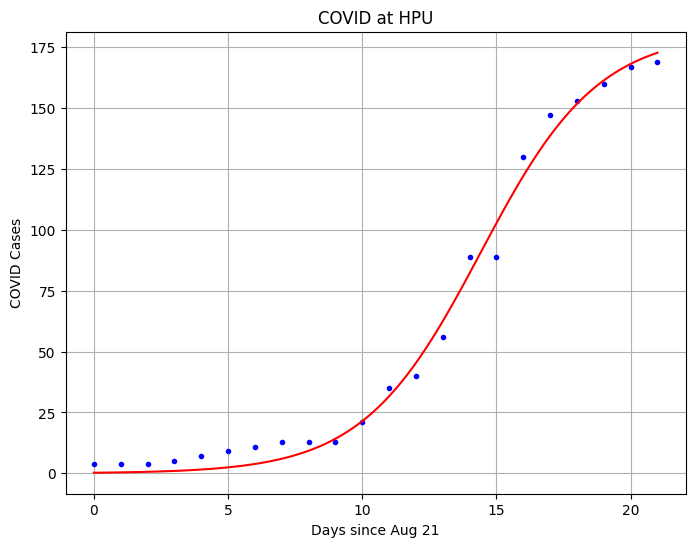

In [45]:
#define data
#The columns are: Day	Total Cases
data = StringIO("""x	y
0	4
1	4
2	4
3	5
4	7
5	9
6	11
7	13
8	13
9	13
10	21
11	35
12	40
13	56
14	89
15	89
16	130
17	147
18	153
19	160
20	167
21	169
""")
                
model = lambda x,L,k,x0: L/(1+np.exp(-k*(x-x0)))
# convert data to dataframe
df = pd.read_csv(data, sep ="\t")
#print(df.head())

# define arrays for the data
xdata = df['x']
ydata = df['y']

guess = [170,1,1]
params,cov = curve_fit(model, xdata,ydata,p0=guess)

xmodel = np.linspace(0,21,100)
ymodel = model(xmodel, *params)

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("COVID at HPU")
plt.xlabel('Days since Aug 21')
plt.ylabel('COVID Cases')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'b.') #plot data
plt.plot(xmodel,ymodel, 'r-')
plt.show()

# Exercise - Gaussian

Manufacturing processes often introduce variation in the product being manufactured. In this case, 79 double-stuffed oreo cookies were pulled apart, and the mass of the creme in the middle was measured. The number of cookies with a mass of creme in a range $m \pm 0.065$ g of a certain mass $m$ was counted. Data for mass $m$ in grams and $N$ are given in the file [double-stuff-oreos.txt](https://github.com/atitus/math-modeling/raw/master/unit-02/02-04-manual-curve-fitting/double-stuff-oreos.txt). (This type of graph is called a histogram.)

Data like this are often fit with a Gaussian function of the form

$$f(x)=ae^{\left(-\frac{1}{2}\left(\frac{x-b}{c}\right)^2\right)}$$

In this case, the independent variable is $m$ and the dependent variable is $N$. So the function for this data is written

$$N=ae^{\left(-\frac{1}{2}\left(\frac{m-b}{c}\right)^2\right)}$$

1. Read the data file and plot the data with proper title and labels.

2. Find the fit parameters and plot the best-fit curve along with the data.


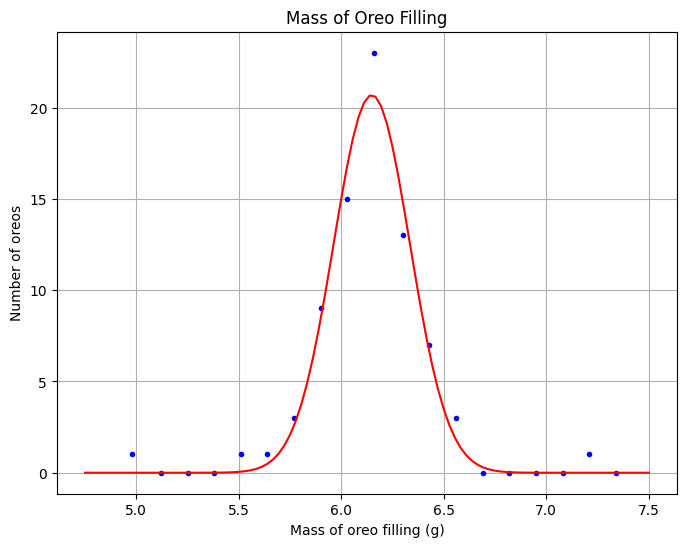

In [54]:
model = lambda x,a,b,c: a*np.exp(-0.5*((x-b)/c)**2)

# convert data to dataframe
df = pd.read_csv("https://raw.githubusercontent.com/atitus/math-modeling/master/unit-02/02-04-manual-curve-fitting/double-stuff-oreos.txt", sep ="\t")
#print(df.head())

# define arrays for the data
xdata = df['mass (g)']
ydata = df['N cookies']

guess = [1,1,1]
params,cov = curve_fit(model, xdata,ydata,p0=guess)

xmodel = np.linspace(4.75,7.5,100)
ymodel = model(xmodel, *params)

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Mass of Oreo Filling")
plt.xlabel('Mass of oreo filling (g)')
plt.ylabel('Number of oreos')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'b.') #plot data
plt.plot(xmodel,ymodel, 'r-')
plt.show()